SOLUTION 1

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import math

In [14]:
train_mel=pd.read_csv("/content/drive/MyDrive/assign1_data/q1/Segment2_MelEnergy.csv",header=None)
test_mel=pd.read_csv("/content/drive/MyDrive/assign1_data/q1/Segment3_MelEnergy.csv",header=None)

train_ste=pd.read_csv("/content/drive/MyDrive/assign1_data/q1/Segment2_STEnergy.csv",header=None)
test_ste=pd.read_csv("/content/drive/MyDrive/assign1_data/q1/Segment3_STEnergy.csv",header=None)

train_gt=pd.read_csv("/content/drive/MyDrive/assign1_data/q1/Segment2_VAD_GT.csv",header=None)
test_gt=pd.read_csv("/content/drive/MyDrive/assign1_data/q1/Segment3_VAD_GT.csv",header=None)

**Input data visualisation**

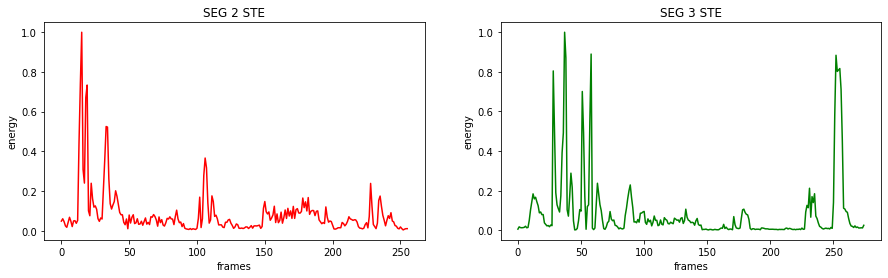

In [15]:
plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(train_ste, 'r')
plt.title("SEG 2 STE")
plt.xlabel('frames')
plt.ylabel('energy')

plt.subplot(1, 2, 2)
plt.plot(test_ste, 'g')
plt.title("SEG 3 STE")
plt.xlabel('frames')
plt.ylabel('energy')
plt.show()

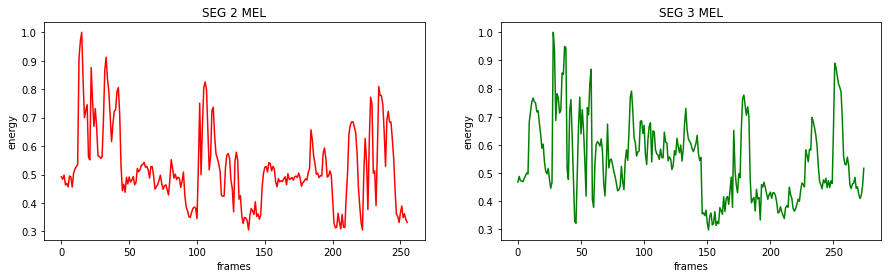

In [16]:
plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(train_mel, 'r')
plt.title("SEG 2 MEL")
plt.xlabel('frames')
plt.ylabel('energy')

plt.subplot(1, 2, 2)
plt.plot(test_mel, 'g')
plt.title("SEG 3 MEL")
plt.xlabel('frames')
plt.ylabel('energy')
plt.show()

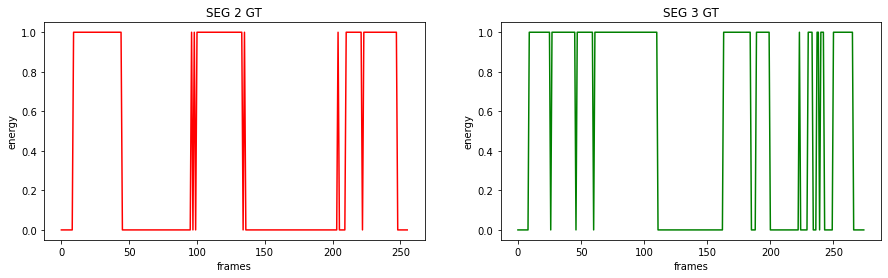

In [17]:
plt.subplots(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(train_gt, 'r')
plt.title("SEG 2 GT")
plt.xlabel('frames')
plt.ylabel('energy')

plt.subplot(1, 2, 2)
plt.plot(test_gt, 'g')
plt.title("SEG 3 GT")
plt.xlabel('frames')
plt.ylabel('energy')
plt.show()

# STE VS MEL

In [18]:
def extract_features(val, gt):
  speech, nonspeech = [], []
  for i in range(len(gt)):
    if gt[i] == 1:
      speech.append(val[i])
    else:
      nonspeech.append(val[i])
  return np.array(speech), np.array(nonspeech)

In [24]:
ste_speech, ste_nonspeech = extract_features(train_ste[0], train_gt[0])

In [28]:
mel_speech, mel_nonspeech = extract_features(train_mel[0], train_gt[0])

In [29]:
prior_STEspeech = len(ste_speech) / len(train_ste[0])
prior_STEnonspeech = len(ste_nonspeech) / len(train_ste[0])

prior_STEspeech, prior_STEnonspeech

In [53]:
ste_mean_s = np.mean(ste_speech)
ste_mean_ns = np.mean(ste_nonspeech)

ste_var_s = np.var(ste_speech)
ste_var_ns = np.var(ste_nonspeech)

mel_mean_s = np.mean(mel_speech)
mel_mean_ns = np.mean(mel_nonspeech)

mel_var_s = np.var(mel_speech)
mel_var_ns = np.var(mel_nonspeech)

d={'Speech':[ste_mean_s,ste_var_s,mel_mean_s,mel_var_s],'Nonspeech':[ste_mean_ns,ste_var_ns,mel_mean_ns,mel_var_ns]}
df = pd.DataFrame(d)
ind=['ste mean','ste variance','mel mean','mel variance']
idx = pd.Index(ind)
df = df.set_index(idx)
df

,Speech,Nonspeech
ste mean,0.120434,0.053091
ste variance,0.027681,0.001294
mel mean,0.610047,0.458655
mel variance,0.022868,0.005185


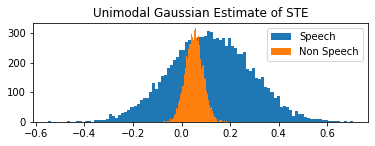

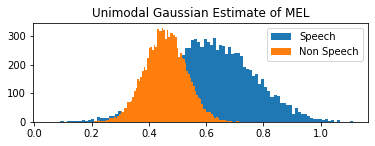

In [65]:
ste_plot_s = np.random.normal(ste_mean_s, np.sqrt(ste_var_s), 10000)
ste_plot_ns = np.random.normal(ste_mean_ns, np.sqrt(ste_var_ns), 10000)
mel_plot_s = np.random.normal(mel_mean_s, np.sqrt(mel_var_s), 10000)
mel_plot_ns = np.random.normal(mel_mean_ns, np.sqrt(mel_var_ns), 10000)

plt.subplot(211)
plt.hist(ste_plot_s, bins=100)
plt.hist(ste_plot_ns, bins=100)
plt.title('Unimodal Gaussian Estimate of STE')
plt.legend(['Speech', 'Non Speech'])
plt.show()
plt.subplot(212)
plt.hist(mel_plot_s, bins=100)
plt.hist(mel_plot_ns, bins=100)
plt.title('Unimodal Gaussian Estimate of MEL')
plt.legend(['Speech', 'Non Speech'])
plt.show()

**CDF Function**

In [55]:
def cdf(x, mean, sd):
  f1 = math.erf(((x-mean)/sd)/np.sqrt(2))
  return (1+f1)/2

**PDF function**

In [56]:
def pdf(x, mean, sd):
  f1 = 1/(sd*np.sqrt(2*np.pi))
  f2 = np.exp(-0.5*((x-mean)/sd)**2)
  return f2/f1

**Testing Phase**

In [58]:
p_ste = []
for xi in test_ste[0]:
  prob_s = pdf(xi, ste_mean_s, np.sqrt(ste_var_s))*prior_STEspeech
  prob_ns = pdf(xi, ste_mean_ns, np.sqrt(ste_var_ns))*prior_STEnonspeech
  p_ste.append(prob_s/(prob_s+prob_ns))
  
min, max = np.min(p_ste), np.max(p_ste)
min, max

(0.7646263762305772, 1.0)

In [60]:
p_mel = []
for xi in test_mel[0]:
  prob_s = pdf(xi, mel_mean_s, np.sqrt(mel_var_s))*prior_STEspeech
  prob_ns = pdf(xi, mel_mean_ns, np.sqrt(mel_var_ns))*prior_STEnonspeech
  p_mel.append(prob_s/(prob_s+prob_ns))

min_mel, max_mel = np.min(p_mel), np.max(p_mel)
min_mel, max_mel

(0.4568031123612492, 0.9999999999907603)

In [64]:
threshold = np.random.uniform(0, 1, size=(1000,))
threshold = sorted(threshold)

threshold_mel = np.random.uniform(0, 1, size=(1000,))
threshold_mel = sorted(threshold_mel)


**Some functions to find Confusion matrix and help to draw ROC curve**

In [66]:
def scores(y, y_pred):
  TP, FP, TN, FN = 0, 0, 0, 0
  for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
      TP+=1
    elif y[i] == 0 and y_pred[i] == 1:
      FP+=1
    elif y[i] == 0 and y_pred[i] == 0:
      TN+= 1
    elif y[i] == 1 and y_pred[i] == 0:
      FN+=1
  return TP, FP, TN, FN

In [67]:
def sensitivity(TP, FN):
  return TP/(TP+FN)

In [68]:
def specificity(TN, FP):
  return TN/(TN+FP)

**ROC CURVES**

In [81]:
# STE
TP, FP, TN, FN = [], [], [], []
for t in threshold:
  y_predicted = [1 if i > t else 0 for i in p_ste]
  w, x, y, z = scores(test_gt[0], y_predicted)
  TP.append(w)
  FP.append(x)
  TN.append(y)
  FN.append(z)

In [82]:
#MEL
TP_mel, FP_mel, TN_mel, FN_mel = [], [], [], []
for t in threshold_mel:
  y_predicted = [1 if i > t else 0 for i in p_mel]
  w, x, y, z = scores(test_gt[0], y_predicted)
  TP_mel.append(w)
  FP_mel.append(x)
  TN_mel.append(y)
  FN_mel.append(z)

In [83]:
print('CONFUSION MATRIX OF STE')
print([[TP[10], FP[10]],[FN[10], TN[10]]])

CONFUSION MATRIX OF STE
[[158, 117], [0, 0]]


In [84]:
print('CONFUSION MATRIX OF MEL')
print([[TP_mel[10], FP_mel[10]],[FN_mel[10], TN_mel[10]]])

CONFUSION MATRIX OF MEL
[[158, 117], [0, 0]]


In [85]:
#STE
TPR, FPR = [], []
for i in range(len(threshold)):
  TPR.append(sensitivity(TP[i], FN[i]))
  FPR.append(1 - specificity(TN[i], FP[i]))



In [86]:
#MEL
TPR_mel, FPR_mel = [], []
for i in range(len(threshold_mel)):
  TPR_mel.append(sensitivity(TP_mel[i], FN_mel[i]))
  FPR_mel.append(1 - specificity(TN_mel[i], FP_mel[i]))

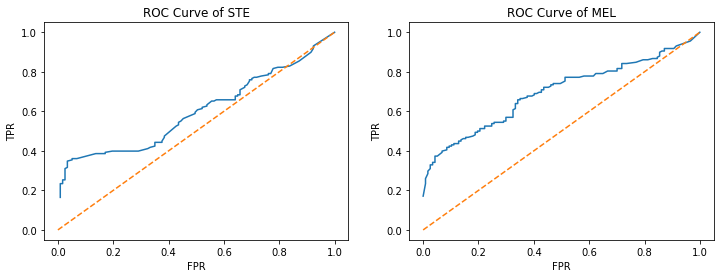

In [94]:
plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of STE')

plt.subplot(122)
plt.plot(FPR_mel, TPR_mel)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve of MEL')
plt.show()

**Comparision of both ROCs in same plot**

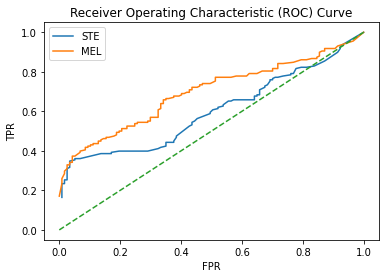

In [100]:
plt.plot(FPR, TPR)
plt.plot(FPR_mel, TPR_mel)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['STE', 'MEL'])
plt.show()

# Because MEL has more area hence MEL is better speech detect than STE 